In [1]:
import sys
sys.path.append('../..')
import ugent

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from pyslise import PyslisePeriodic, Pyslise
from math import pi

def V(x):
    return 3*x*x*(pi-x)

periodic = PyslisePeriodic(V, 0, pi, tolerance=1e-14)
forward = Pyslise(V, 0, pi, tolerance=1e-14)

eigs = periodic.eigenvaluesByIndex(0, 10)
print(eigs)

[(0, 4.3018482904455375, 1), (1, 11.075846483818362, 1), (2, 14.031553319790294, 1), (3, 24.047387349500138, 1), (4, 24.189738198817437, 1), (5, 43.86049447489741, 1), (6, 43.9586891894956, 1), (7, 71.80848955773388, 1), (8, 71.8708988995195, 1), (9, 107.78659112882627, 1)]


In [263]:
import numpy as np
from math import sin, cos

Es = np.linspace(-2, 30, 600)
alphas = np.linspace(0, pi, 400) + 0.01

m = forward.__sector(forward.__matchIndex).min


data = np.array([
    [
        forward.propagate(E, (sin(alpha), cos(alpha)), 0, m)[1] - forward.propagate(E, (sin(alpha), cos(alpha)), pi, m)[1] for E in Es
    ] for alpha in alphas
])

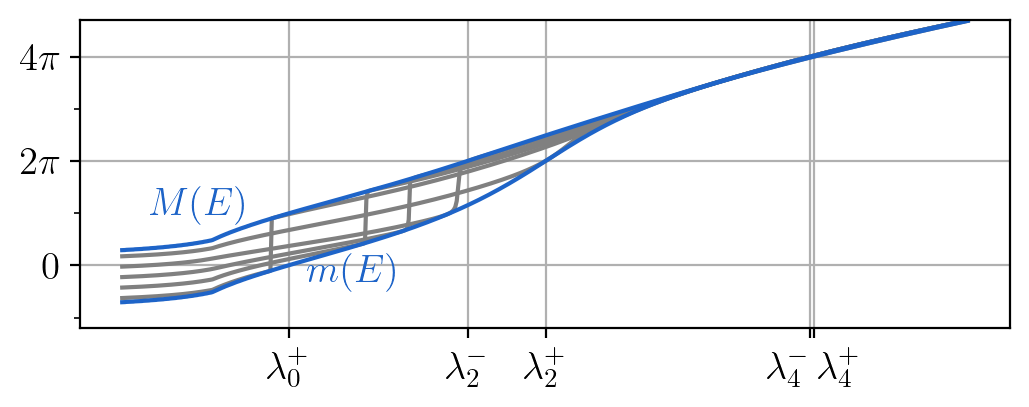

In [264]:
skip = len(alphas) // 5

fig, ax = plt.subplots(1,1, figsize=(6, 2), dpi=200)

for alpha, theta in zip(alphas[::skip], data[::skip]):
    ax.plot(Es, theta, color="gray")

ax.set_yticks([0, 2*pi, 4*pi])
ax.set_yticks([-pi, pi, 3*pi], minor=True)
ax.set_yticklabels(["$0$", "$2\\pi$", "$4\\pi$"])
ax.set_ylim(-1.2*pi, 4.7*pi)
ticks = []
for i, E, m in eigs[:5]:
    ticks.append(E)
ax.set_xticks(ticks)
ax.set_xticklabels(["$\\lambda_0^+$", "$\\lambda_2^-$", "$\\lambda_2^+$", "", "$\\lambda_4^- \\, \\lambda_4^+$"])
ax.grid(axis="x", which="major")
ax.grid(axis="y", which="major")
ax.text(-1, 3, "$M(E)$", color=ugent.blauw)
ax.text(5, -1, "$m(E)$", color=ugent.blauw)
# ax.set_xlabel("$E$")
    
ax.plot(Es, np.min(data, axis=0), color=ugent.blauw)
ax.plot(Es, np.max(data, axis=0), color=ugent.blauw)
plt.savefig("periodic_minmax.pdf", bbox_inches="tight")

In [265]:
from pyslise import PyslisePeriodic, Pyslise
from math import pi

def V(x):
    return 3*x*x*(pi-x)

periodic = PyslisePeriodic(V, 0, pi, tolerance=1e-14)
forward = Pyslise(V, 0, pi, tolerance=1e-14)

eigs = periodic.eigenvaluesByIndex(0, 10)
print(eigs)

[(0, 4.3018482904455375, 1), (1, 11.075846483818362, 1), (2, 14.031553319790294, 1), (3, 24.047387349500138, 1), (4, 24.189738198817437, 1), (5, 43.86049447489741, 1), (6, 43.9586891894956, 1), (7, 71.80848955773388, 1), (8, 71.8708988995195, 1), (9, 107.78659112882627, 1)]


In [266]:
import numpy as np
from math import sin, cos

Es = np.linspace(1, 22, 600)
alphas = np.linspace(0, pi, 100) + 0.01

m = forward.__sector(forward.__matchIndex).min


data = np.array([
    [
        forward.propagate(E, (sin(alpha), cos(alpha)), 0, m)[1] - forward.propagate(E, (sin(alpha), cos(alpha)), pi, m)[1] for E in Es
    ] for alpha in alphas
])

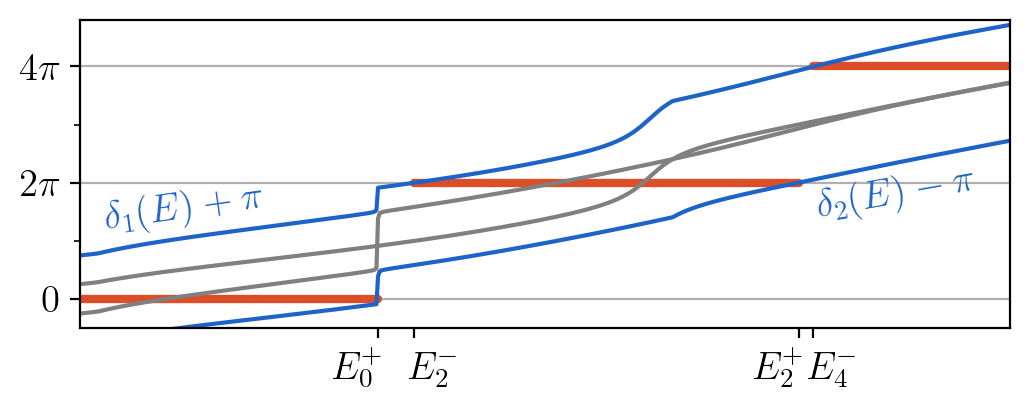

In [268]:
import matplotlib.transforms


a = 45
b = (len(alphas)//2 + a)%len(alphas)

l1 = int((len(Es)-1) * 0)
l2 = int((len(Es)-1) * 1)

fig, ax = plt.subplots(1,1, figsize=(6, 2), dpi=200)

d1 = np.min([data[a,:], data[b,:]], axis=0)
d2 = np.max([data[a,:], data[b,:]], axis=0)

ax.set_yticks(*zip(*[(pi*i, "$0$" if i == 0 else "$\\pi$" if i == 1 else f"${i}\\pi$") for i in range(0, 5, 2)]))
ax.set_yticks([pi*i for i in range(-1, 6, 1)], minor=True)

ax.grid(axis="y", which="major")

ax.set_ylim(-.5*pi, 4.8*pi)
ax.set_xlim(Es[l1], Es[l2])

low = {}
high = {}
tl = []
for k in [0, 2, 4]:
    loc = (d2 - pi > k * pi).nonzero()[0]
    if len(loc) > 0:
        E = Es[np.min(loc)]
        high[k] = E
        tl.append((E, f"$E_{{{k}}}^{{+}}$"))
    loc = (d1 + pi < k * pi).nonzero()[0]
    if len(loc) > 0:
        E = Es[np.max(loc)]
        low[k] = E
        tl.append((E, f"$E_{{{k}}}^{{-}}$"))
ax.set_xticks(*zip(*sorted(tl)))
for k, label in enumerate(ax.get_xticklabels()):
    offset = matplotlib.transforms.ScaledTranslation((-1 if k % 2 == 0 else 1)*0.1, 0, fig.dpi_scale_trans)
    label.set_transform(label.get_transform() + offset)
low[0] = -10
high[4] = 100

for k in [0, 2, 4]:
    ax.plot([low[k], high[k]], [k*pi, k*pi], c=ugent.rood, lw=3, alpha=1, solid_capstyle="round")

ax.plot(Es[l1:l2], data[a, l1:l2], c='gray')
ax.plot(Es[l1:l2], data[b, l1:l2], c='gray')
ax.plot(Es[l1:l2], d1[l1:l2]+pi, c=ugent.blauw)
ax.plot(Es[l1:l2], d2[l1:l2]-pi, c=ugent.blauw)

t1 = l1 + 120
ax.text(Es[t1], d1[t1]+pi+1, "$\\delta_1(E) + \pi$", va="center", ha="right", rotation=8, c=ugent.blauw)

t2 = l2 - 20
ax.text(Es[t2], d2[t2]-pi-.8, "$\\delta_2(E) - \pi$", va="top", ha="right", rotation=10, c=ugent.blauw)

plt.savefig("periodic_find_ep_em.pdf", bbox_inches="tight")
# m1 = l2 - 60
# ax.text(Es[m1]-0.1, d1[m1] + pi/2, "$\\pi$", va="center", ha="right")
# ax.plot([Es[m1], Es[m1]], [d1[m1], d1[m1]+pi], marker="_", c=ugent.zwart, zorder=10)
# m2 = l2 - 100
# ax.text(Es[m2]+0.1, d2[m2] - pi/2, "$\\pi$", va="center", ha="left")
# ax.plot([Es[m2], Es[m2]], [d2[m2], d2[m2]-pi], marker="_", c=ugent.zwart, zorder=10)